In [ ]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()

In [2]:
csv_name = "produtos.csv"

df = pd.read_csv(csv_name)

In [3]:
display(df.head())

id unit_measure  quantity_input expiration_date  quantity_measure  \
0  1001           kg              74      2026-09-25                10   
1  1002           UN              95      2025-08-20                 7   
2  1003           UN              27      2025-04-19                 9   
3  1004            L              53      2026-11-03                18   
4  1005            L               1      2025-04-05                 2   

   days_to_sold  product_input_showcase_today  
0            21                         False  
1            27                          True  
2            23                          True  
3            14                         False  
4             3                         False

In [4]:
df['expiration_date'] = pd.to_datetime(df['expiration_date'])
df['unit_measure'] = le.fit_transform(df['unit_measure'])



df['expiration_year'] = df['expiration_date'].dt.year
df['expiration_month'] = df['expiration_date'].dt.month
df['expiration_day'] = df['expiration_date'].dt.day
df['expiration_week'] = df['expiration_date'].dt.dayofweek  # 0 = segunda, 6 = domingo
df['expiration_day_of_year'] = df['expiration_date'].dt.dayofyear



df['expiration_month_sin'] = np.sin(2 * np.pi * df['expiration_month'] / 12)
df['expiration_month_cos'] = np.cos(2 * np.pi * df['expiration_month'] / 12)

df['expiration_day_sin'] = np.sin(2 * np.pi * df['expiration_day'] / 7)
df['expiration_day_cos'] = np.cos(2 * np.pi * df['expiration_day'] / 7)

df = df.drop('expiration_date', axis=1)

df

id  unit_measure  quantity_input  quantity_measure  days_to_sold  \
0      1001             2              74                10            21   
1      1002             1              95                 7            27   
2      1003             1              27                 9            23   
3      1004             0              53                18            14   
4      1005             0               1                 2             3   
...     ...           ...             ...               ...           ...   
9995  10996             1               9                 7            17   
9996  10997             2              32                 1            11   
9997  10998             1              55                 4            24   
9998  10999             0              97                13            27   
9999  11000             0              33                 8            23   

      product_input_showcase_today  expiration_year  expiration_month  \
0                            False             2026                 9   
1                             True             2025                 8   
2                             True             2025                 4   
3                            False             2026                11   
4                            False             2025                 4   
...                            ...              ...               ...   
9995                          True             2025                 5   
9996                          True             2026                 7   
9997                         False             2025                10   
9998                         False             2026                 6   
9999                          True             2026                 4   

      expiration_day  expiration_week  expiration_day_of_year  \
0                 25                4                     268   
1                 20                2                     232   
2                 19                5                     109   
3                  3                1                     307   
4                  5                5                      95   
...              ...              ...                     ...   
9995              15                3                     135   
9996               7                1                     188   
9997              25                5                     298   
9998               5                4                     156   
9999               5                6                      95   

      expiration_month_sin  expiration_month_cos  expiration_day_sin  \
0            -1.000000e+00         -1.836970e-16       -4.338837e-01   
1            -8.660254e-01         -5.000000e-01       -7.818315e-01   
2             8.660254e-01         -5.000000e-01       -9.749279e-01   
3            -5.000000e-01          8.660254e-01        4.338837e-01   
4             8.660254e-01         -5.000000e-01       -9.749279e-01   
...                    ...                   ...                 ...   
9995          5.000000e-01         -8.660254e-01        7.818315e-01   
9996         -5.000000e-01         -8.660254e-01       -2.449294e-16   
9997         -8.660254e-01          5.000000e-01       -4.338837e-01   
9998          1.224647e-16         -1.000000e+00       -9.749279e-01   
9999          8.660254e-01         -5.000000e-01       -9.749279e-01   

      expiration_day_cos  
0              -0.900969  
1               0.623490  
2              -0.222521  
3              -0.900969  
4              -0.222521  
...                  ...  
9995            0.623490  
9996            1.000000  
9997           -0.900969  
9998           -0.222521  
9999           -0.222521  

[10000 rows x 15 columns]

In [ ]:
X = df.drop('product_input_showcase_today', axis=1)
y = df['product_input_showcase_today']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # porcentagem para teste
    random_state=42,      # garante reprodutibilidade
    stratify=y            # mantém a proporção das classes (opcional, útil em classificação)
)

In [20]:
modelos = {
    "Decision Tree Gini": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Decision Tree Entropia": DecisionTreeClassifier(criterion='entropy', random_state=42),
}

param_grids = {
    "Decision Tree Gini": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 5, 10],
        'min_samples_split': [2, 5, 10],
        'splitter': ['best', 'random'],
        'ccp_alpha': [0.0, 0.01, 0.1],
        'class_weight': [None, 'balanced']
    },
    "Decision Tree Entropia": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 5, 10],
        'min_samples_split': [2, 5, 10],
        'splitter': ['best', 'random'],
        'ccp_alpha': [0.0, 0.01, 0.1],
        'class_weight': [None, 'balanced']
    }
}

scoring_metric = 'accuracy'

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)

In [19]:
model.score(X, y)

0.9142

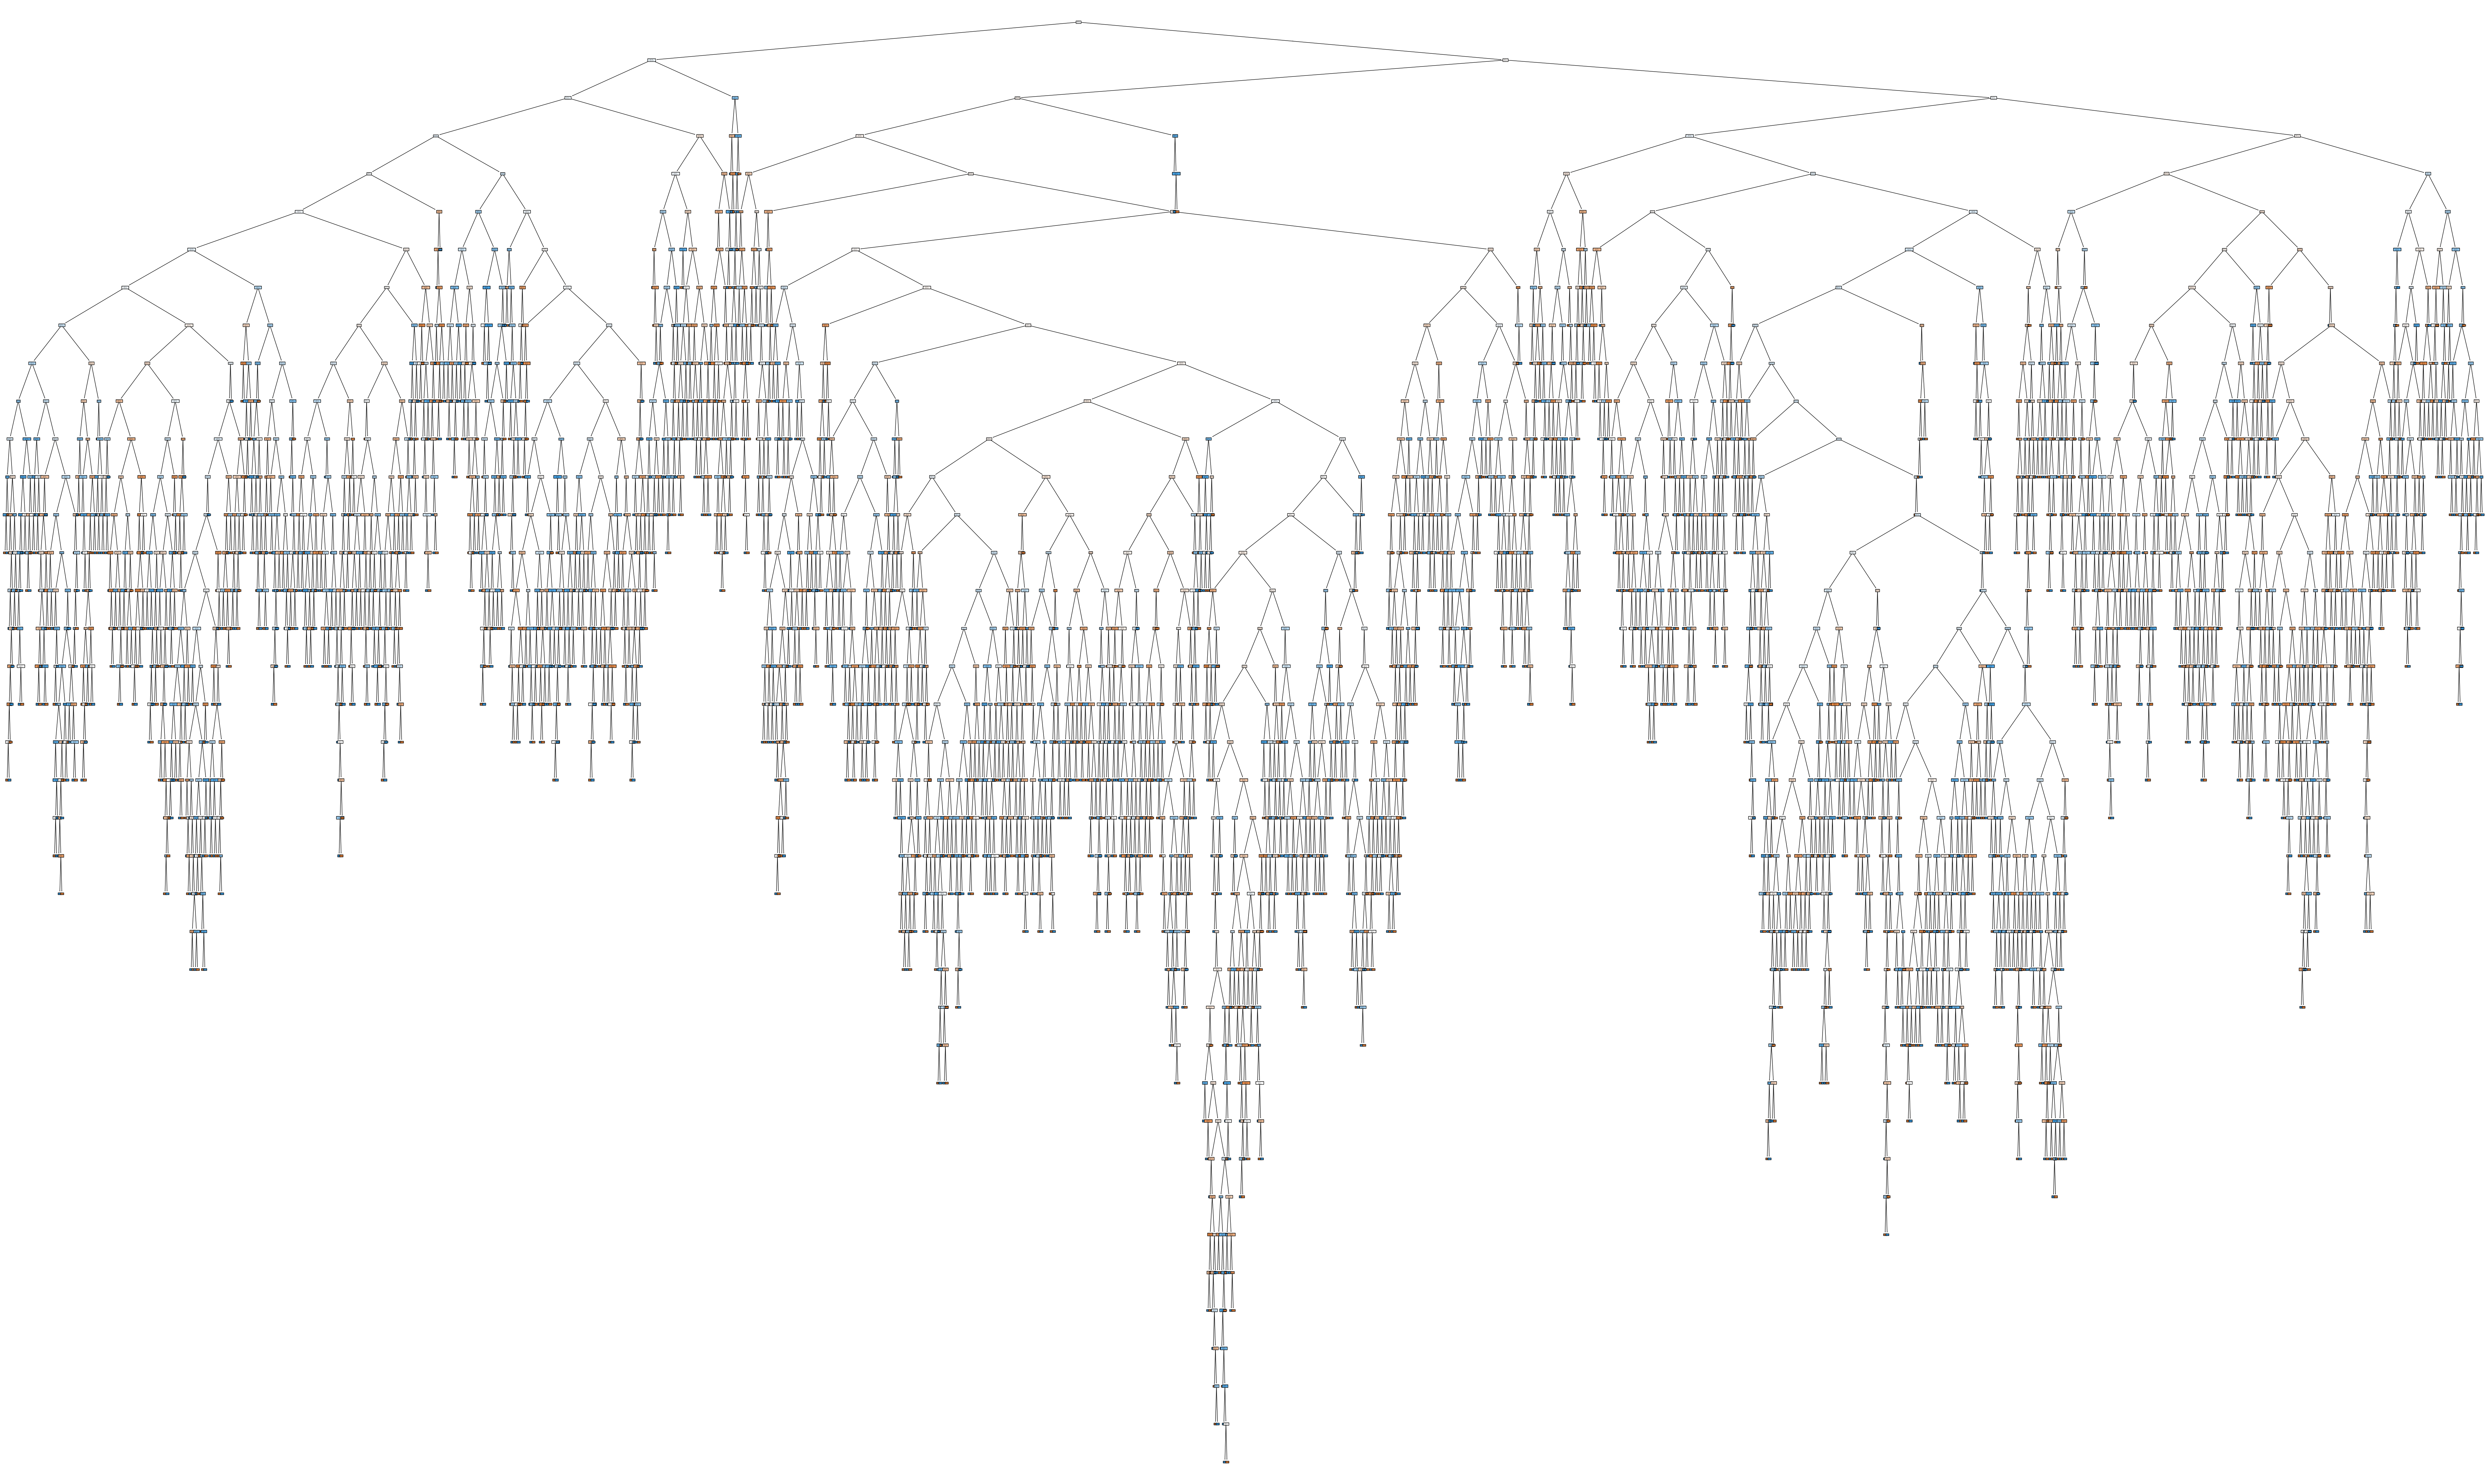

In [7]:
plt.figure(figsize=(100,60))

# Converter classes booleanas para string
class_names_str = [str(c) for c in model.classes_]

plot_tree(model, feature_names=X.columns, class_names=class_names_str, filled=True)
plt.show()

In [8]:
y_pred = model.predict(X)

In [22]:
print("Acurácia:", accuracy_score(y, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y, y_pred))

Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4970
        True       1.00      1.00      1.00      5030

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

